In [2]:
#Library imports
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
sns.set()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd >= 1.0.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("default of credit card clientss.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df1=df.copy()
df1.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [5]:
df.shape 

(30000, 25)

In [6]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [8]:
df.isnull().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
#Checking Unique value for categorical value
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))
print('default payment next month ' + str(sorted(df['default payment next month'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default payment next month [0, 1]


In [10]:
#Grouping 0,5 and 6 in education category since they all constitute to other
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [11]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0



From the mean of DEFAULT, it shows around 22% default.

Reffering to PAY_1 ~ PAY_6, at least 75% of client are not in payment delay status.

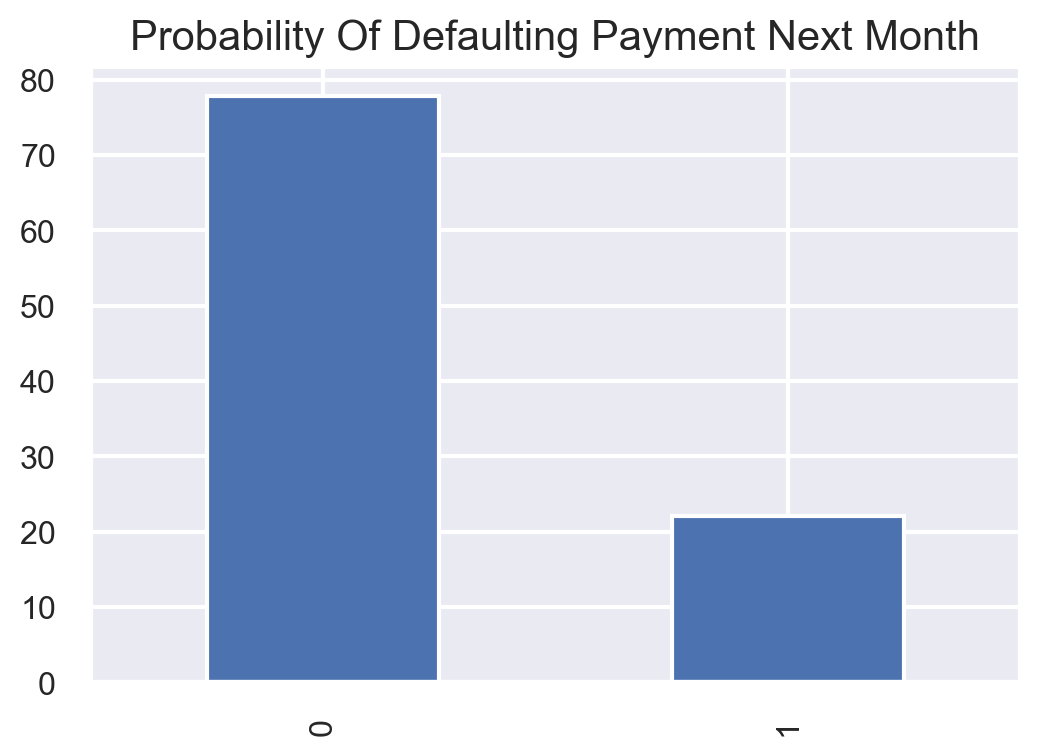

In [14]:
def_cnt = (df.DEFAULT.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,4))
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
plt.show()

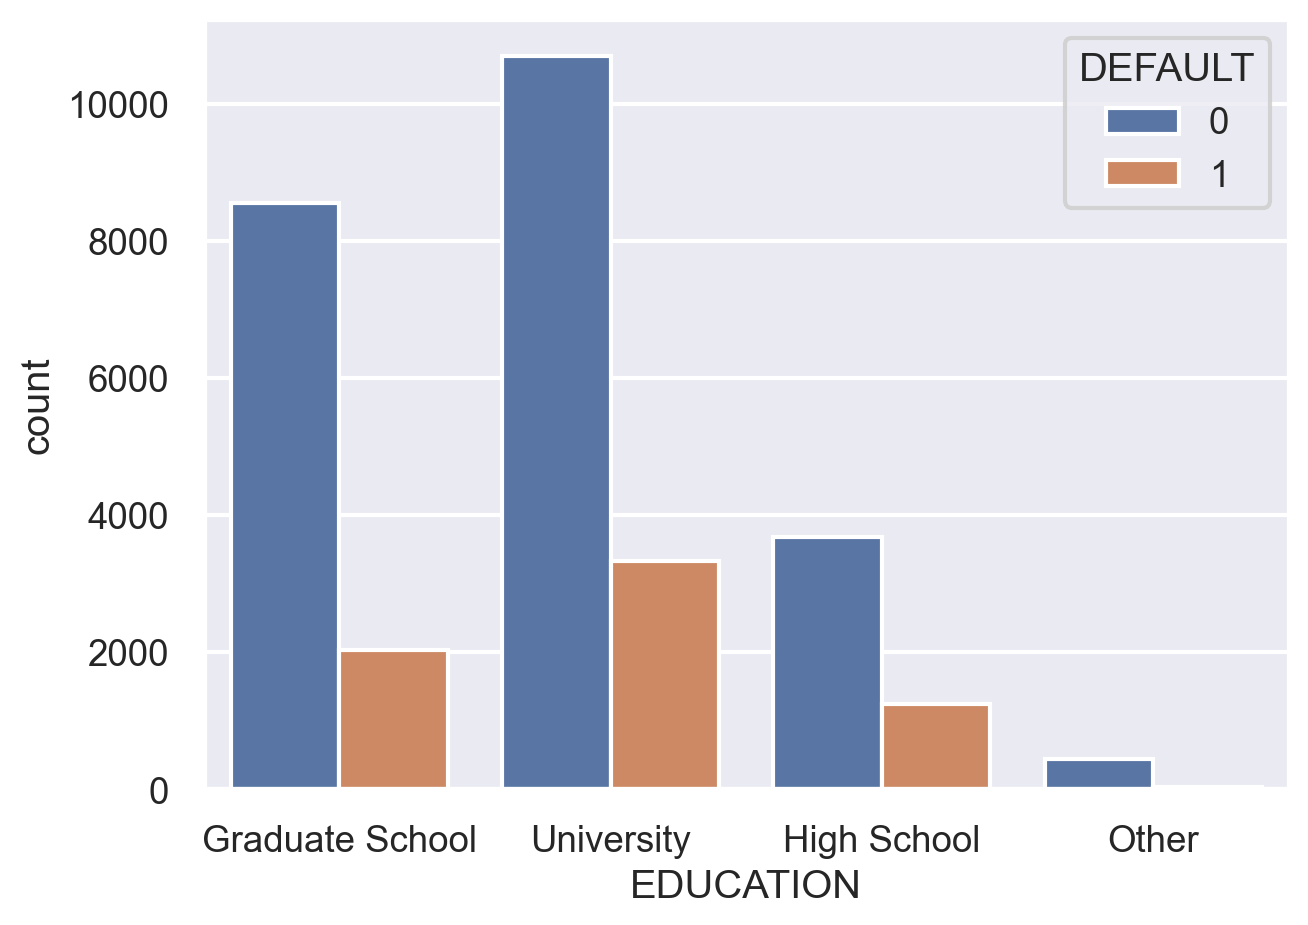

In [15]:
#Education vs Default
sns.set(rc={'figure.figsize':(7,5)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [16]:
default0 = df.groupby(df['EDUCATION'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['EDUCATION'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('EDUCATION').size().reset_index(name='TOTAL')

eduTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']

eduTable

,EDUCATION,NOT_DEFAULT,DEFAULT,TOTAL
0,Graduate School,8549,2036,10585
1,University,10700,3330,14030
2,High School,3680,1237,4917
3,Other,435,33,468


the Default Count for High School is lower than Graduate School & University.

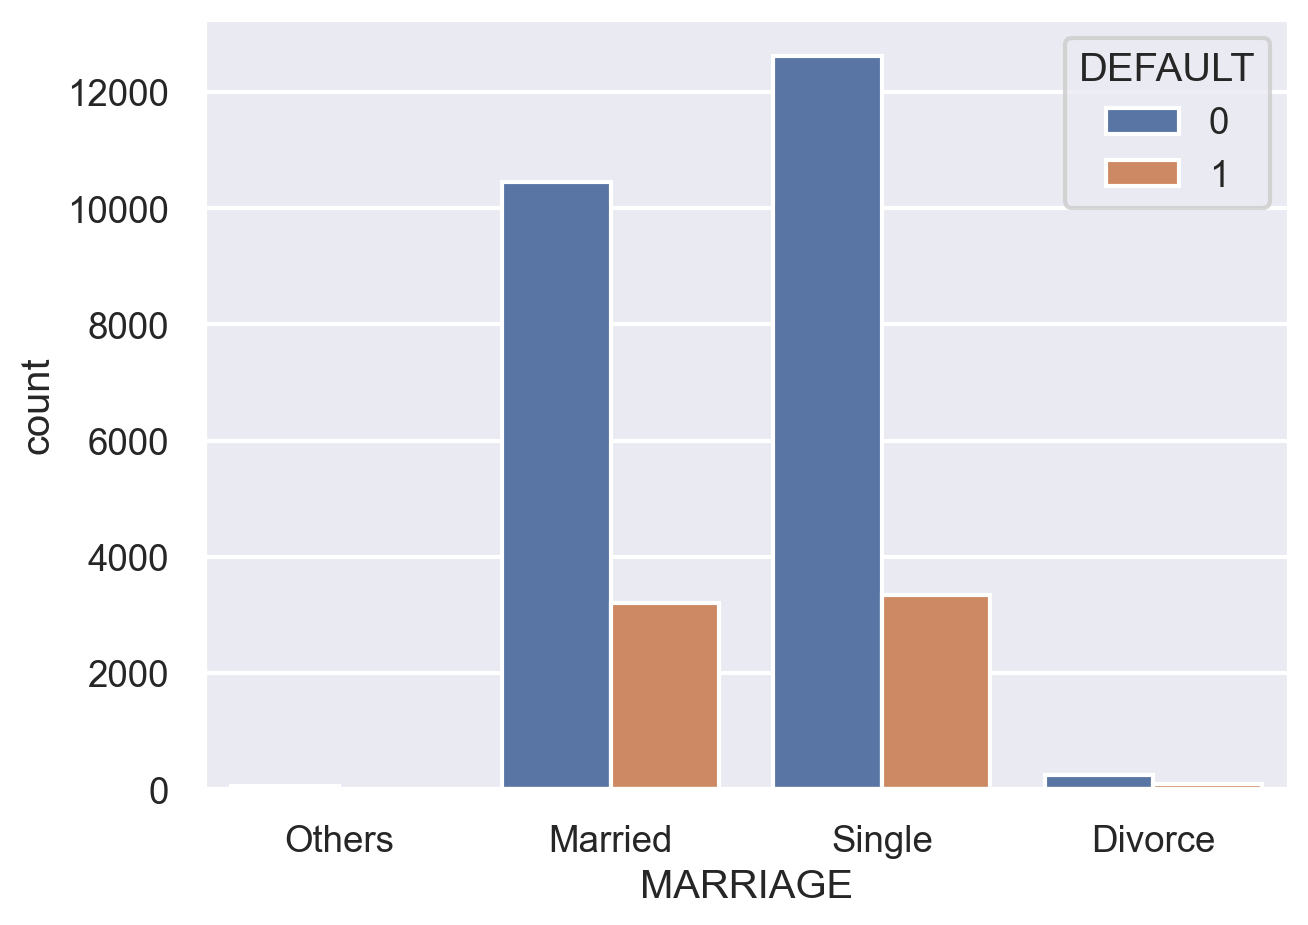

In [17]:
# Marriage vs default
sns.set(rc={'figure.figsize':(7,5)})
sns.set_context("talk", font_scale=0.8)

marri = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df )
marri.set_xticklabels(['Others','Married','Single','Divorce'])
plt.show()

In [18]:
default0 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Others','Married','Single','Divorce']

marriTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Others,49,5,54
1,Married,10453,3206,13659
2,Single,12623,3341,15964
3,Divorce,239,84,323


Although the Default Count for Divorce is way lower than Single & Married. But in terms of Default Percentage, those who Divorce have higher chance of Default.

PAY_1: Repayment status in September, 2005 (most recent month)

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

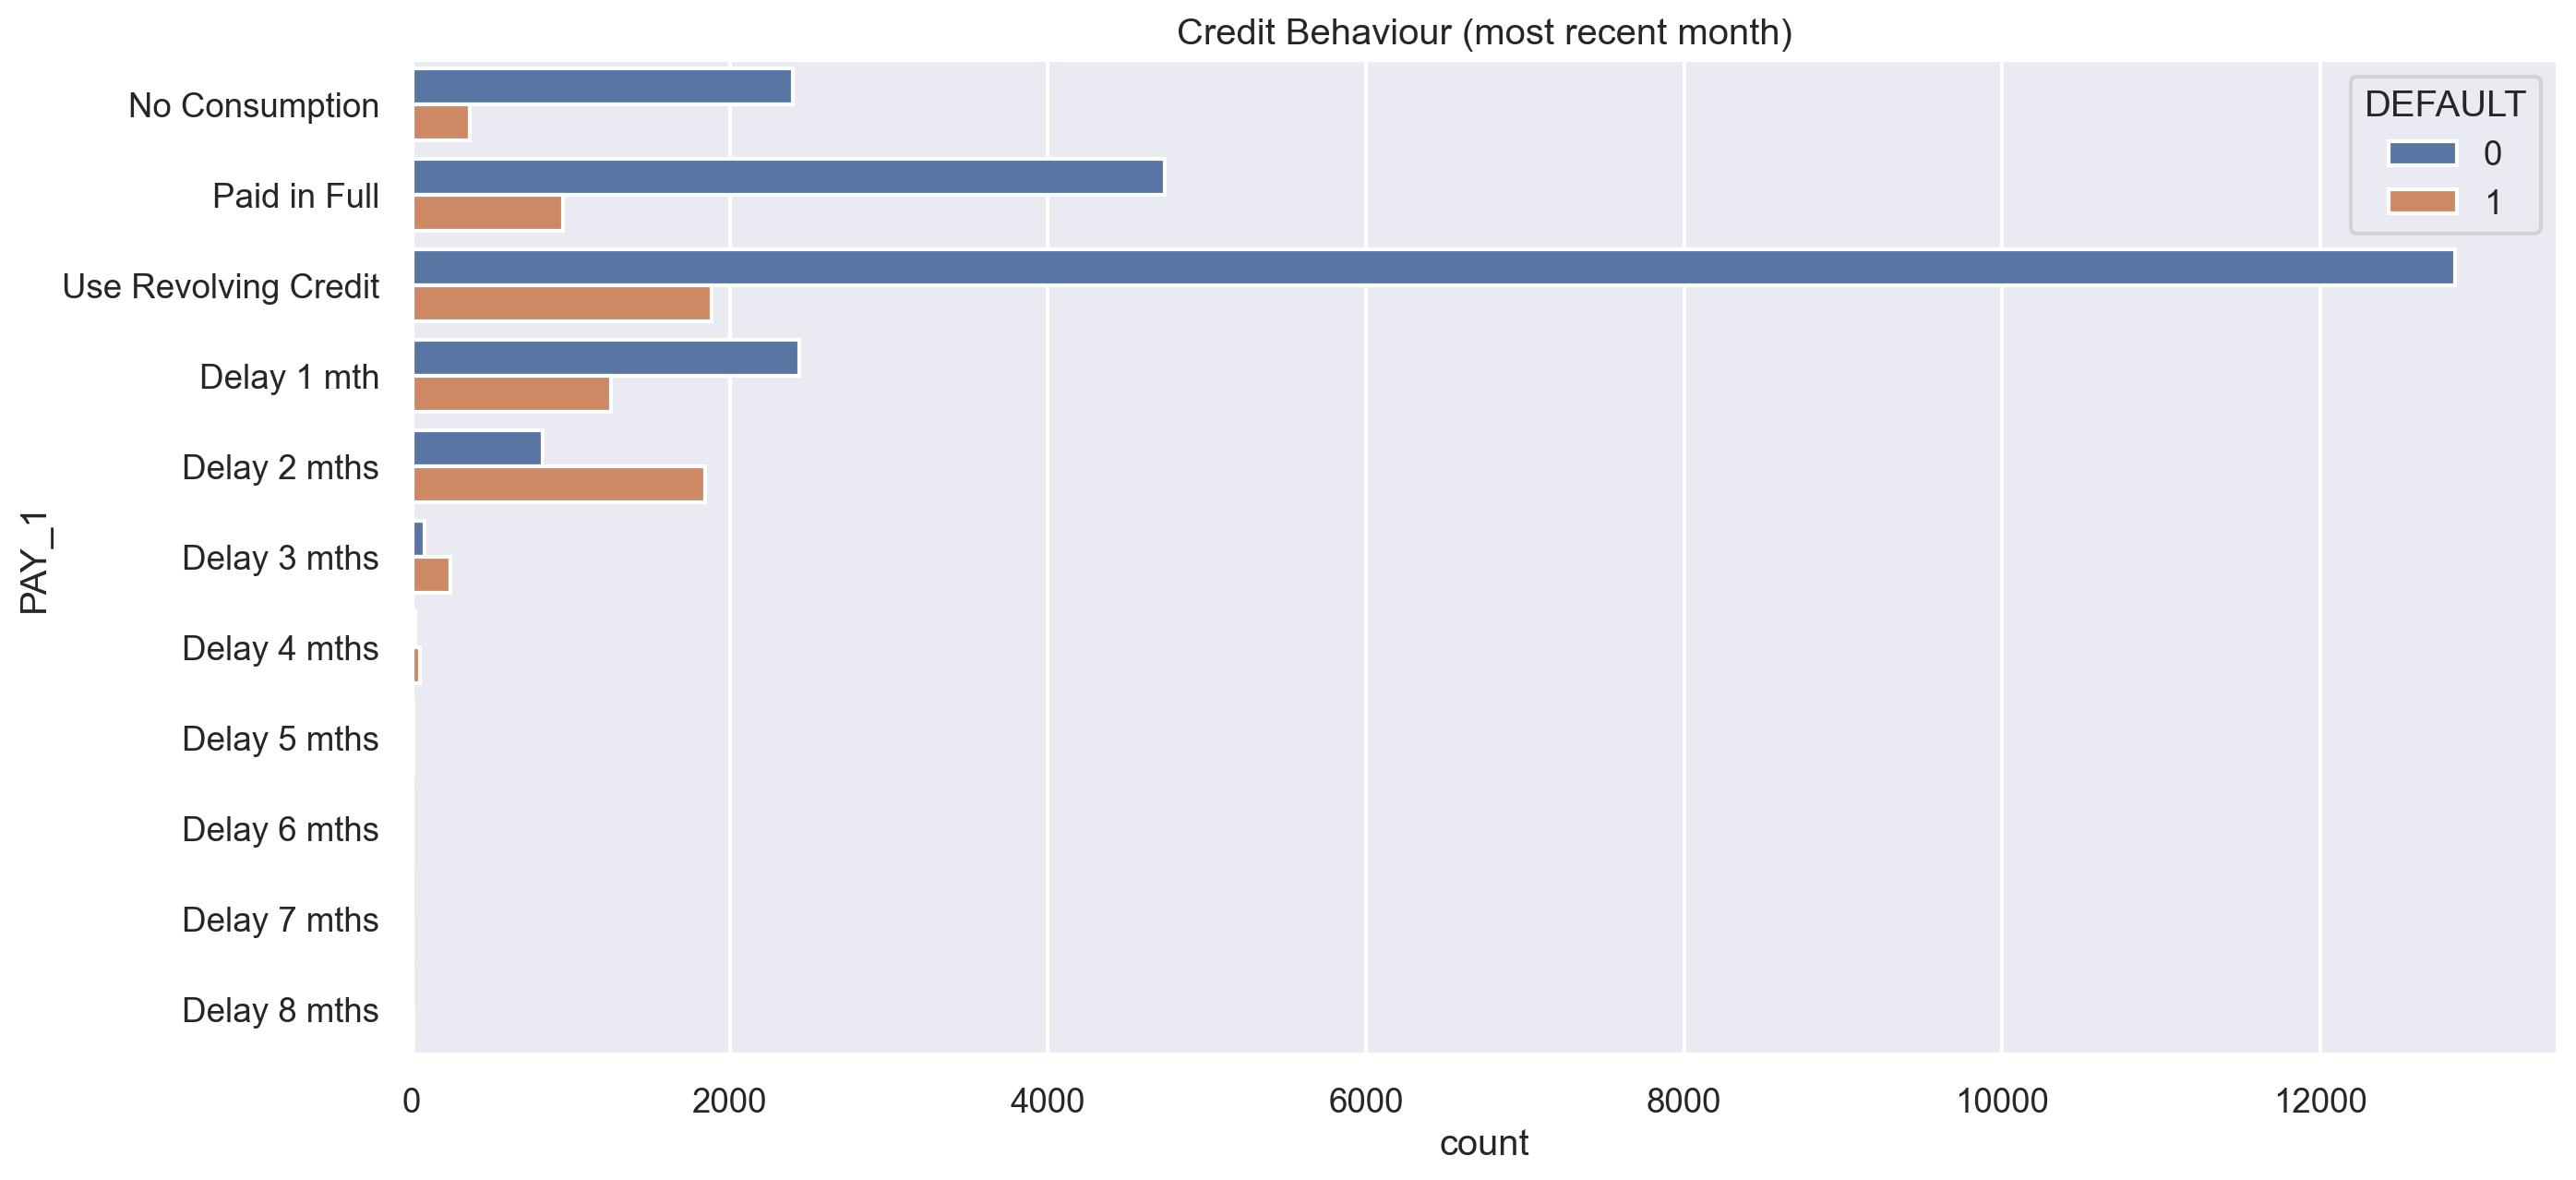

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

In [20]:
default0 = df.groupby(df['PAY_1'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['PAY_1'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table

,PAY_1,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2394,365,2759
1,Paid in Full,4732,954,5686
2,Use Revolving Credit,12849,1888,14737
3,Delay 1 mth,2436,1252,3688
4,Delay 2 mths,823,1844,2667
5,Delay 3 mths,78,244,322
6,Delay 4 mths,24,52,76
7,Delay 5 mths,13,13,26
8,Delay 6 mths,5,6,11
9,Delay 7 mths,2,7,9


Summary (Credit Behaviour vs. Default)
Those Using Revolving Credit (paid only minimum) and those delayed for 2 months have the highest Default Count.
When payment is delayed more than 2 months, the chances of default goes higher than 50%.

Removing Negative values in the data that may be caused by contradicting information

In [21]:
error1 = df.query('BILL_AMT1 < 0 and DEFAULT == 1').loc[:,('ID','BILL_AMT1','DEFAULT')]
error1.sample(5)

,ID,BILL_AMT1,DEFAULT
29998,29999,-1645,1
1974,1975,-2000,1
2531,2532,-2,1
23652,23653,-113,1
16046,16047,-4,1


In [22]:
error2 = df.query('BILL_AMT1 > LIMIT_BAL').loc[:,('ID','LIMIT_BAL','BILL_AMT1')]
error2.sample(5)

,ID,LIMIT_BAL,BILL_AMT1
1549,1550,110000,115895
11370,11371,50000,51396
1602,1603,100000,101503
23952,23953,20000,20873
23902,23903,50000,51232


In [23]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

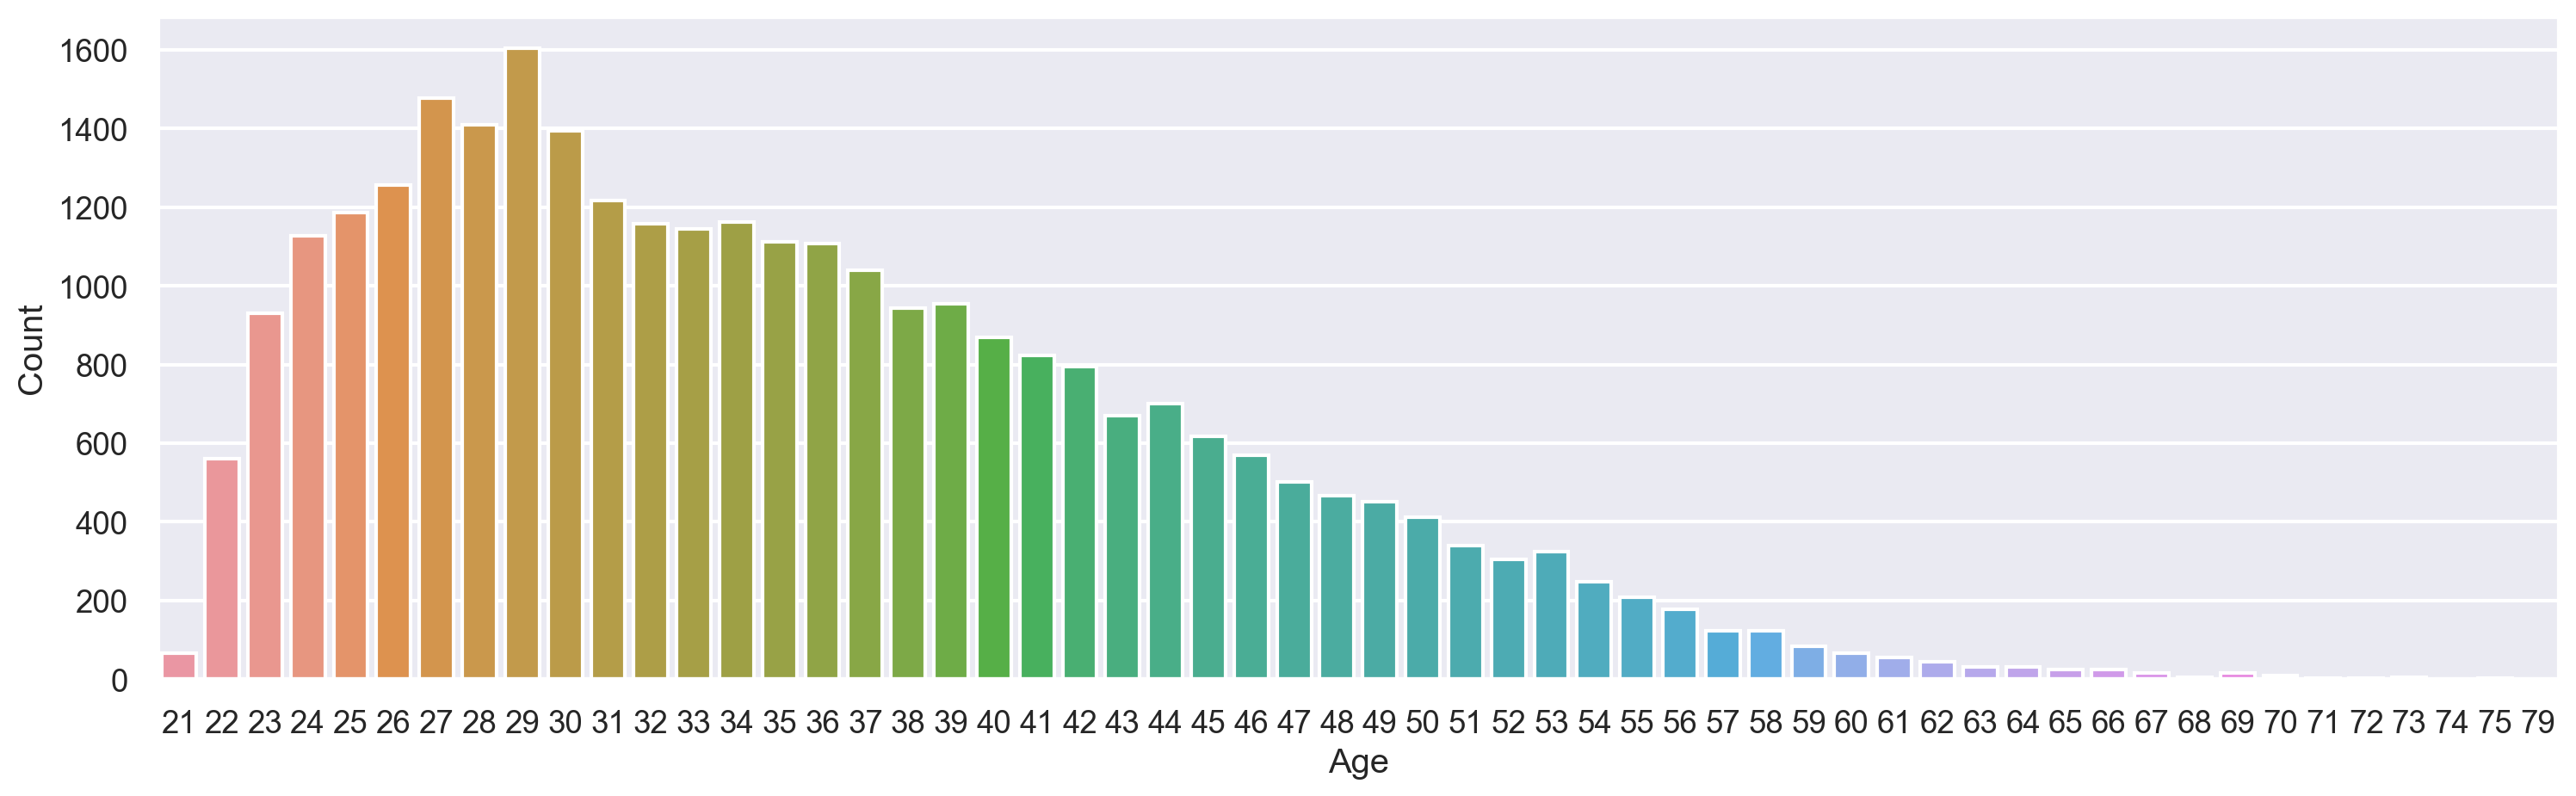

In [24]:
plt.figure(figsize=(18,5))
age=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Youngest client is 21 years old, and oldest is 69.
Most client is age range from 26 to 35.
With some specific age group having extra high number of people.

In [25]:
default0 = df.groupby(df['AGE'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default0 = default0.fillna(0)
default1 = df.groupby(df['AGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
default1 = default1.fillna(0)
total = df.groupby('AGE').size().reset_index(name='TOTAL')

ageTable = total.join(default0.set_index('AGE'),on='AGE').join(default1.set_index('AGE'),on='AGE')
ageTable = ageTable[['AGE', 'NOT_DEFAULT', 'DEFAULT', 'TOTAL']]
ageTable = ageTable.fillna(0)
ageTable.head(4)

,AGE,NOT_DEFAULT,DEFAULT,TOTAL
0,21,53,14.0,67
1,22,391,169.0,560
2,23,684,247.0,931
3,24,827,300.0,1127


In [26]:
ageTable['NOT_DEFAULT'] = round((ageTable['NOT_DEFAULT']/ageTable['TOTAL'])*100,2)
ageTable['DEFAULT'] = round((ageTable['DEFAULT']/ageTable['TOTAL'])*100,2)

agePct = ageTable.iloc[:,0:3]
agePct = agePct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

agePct.head(4)

,AGE,NOT_DEFAULT(%),DEFAULT(%)
0,21,79.10,20.90
1,22,69.82,30.18
2,23,73.47,26.53
3,24,73.38,26.62


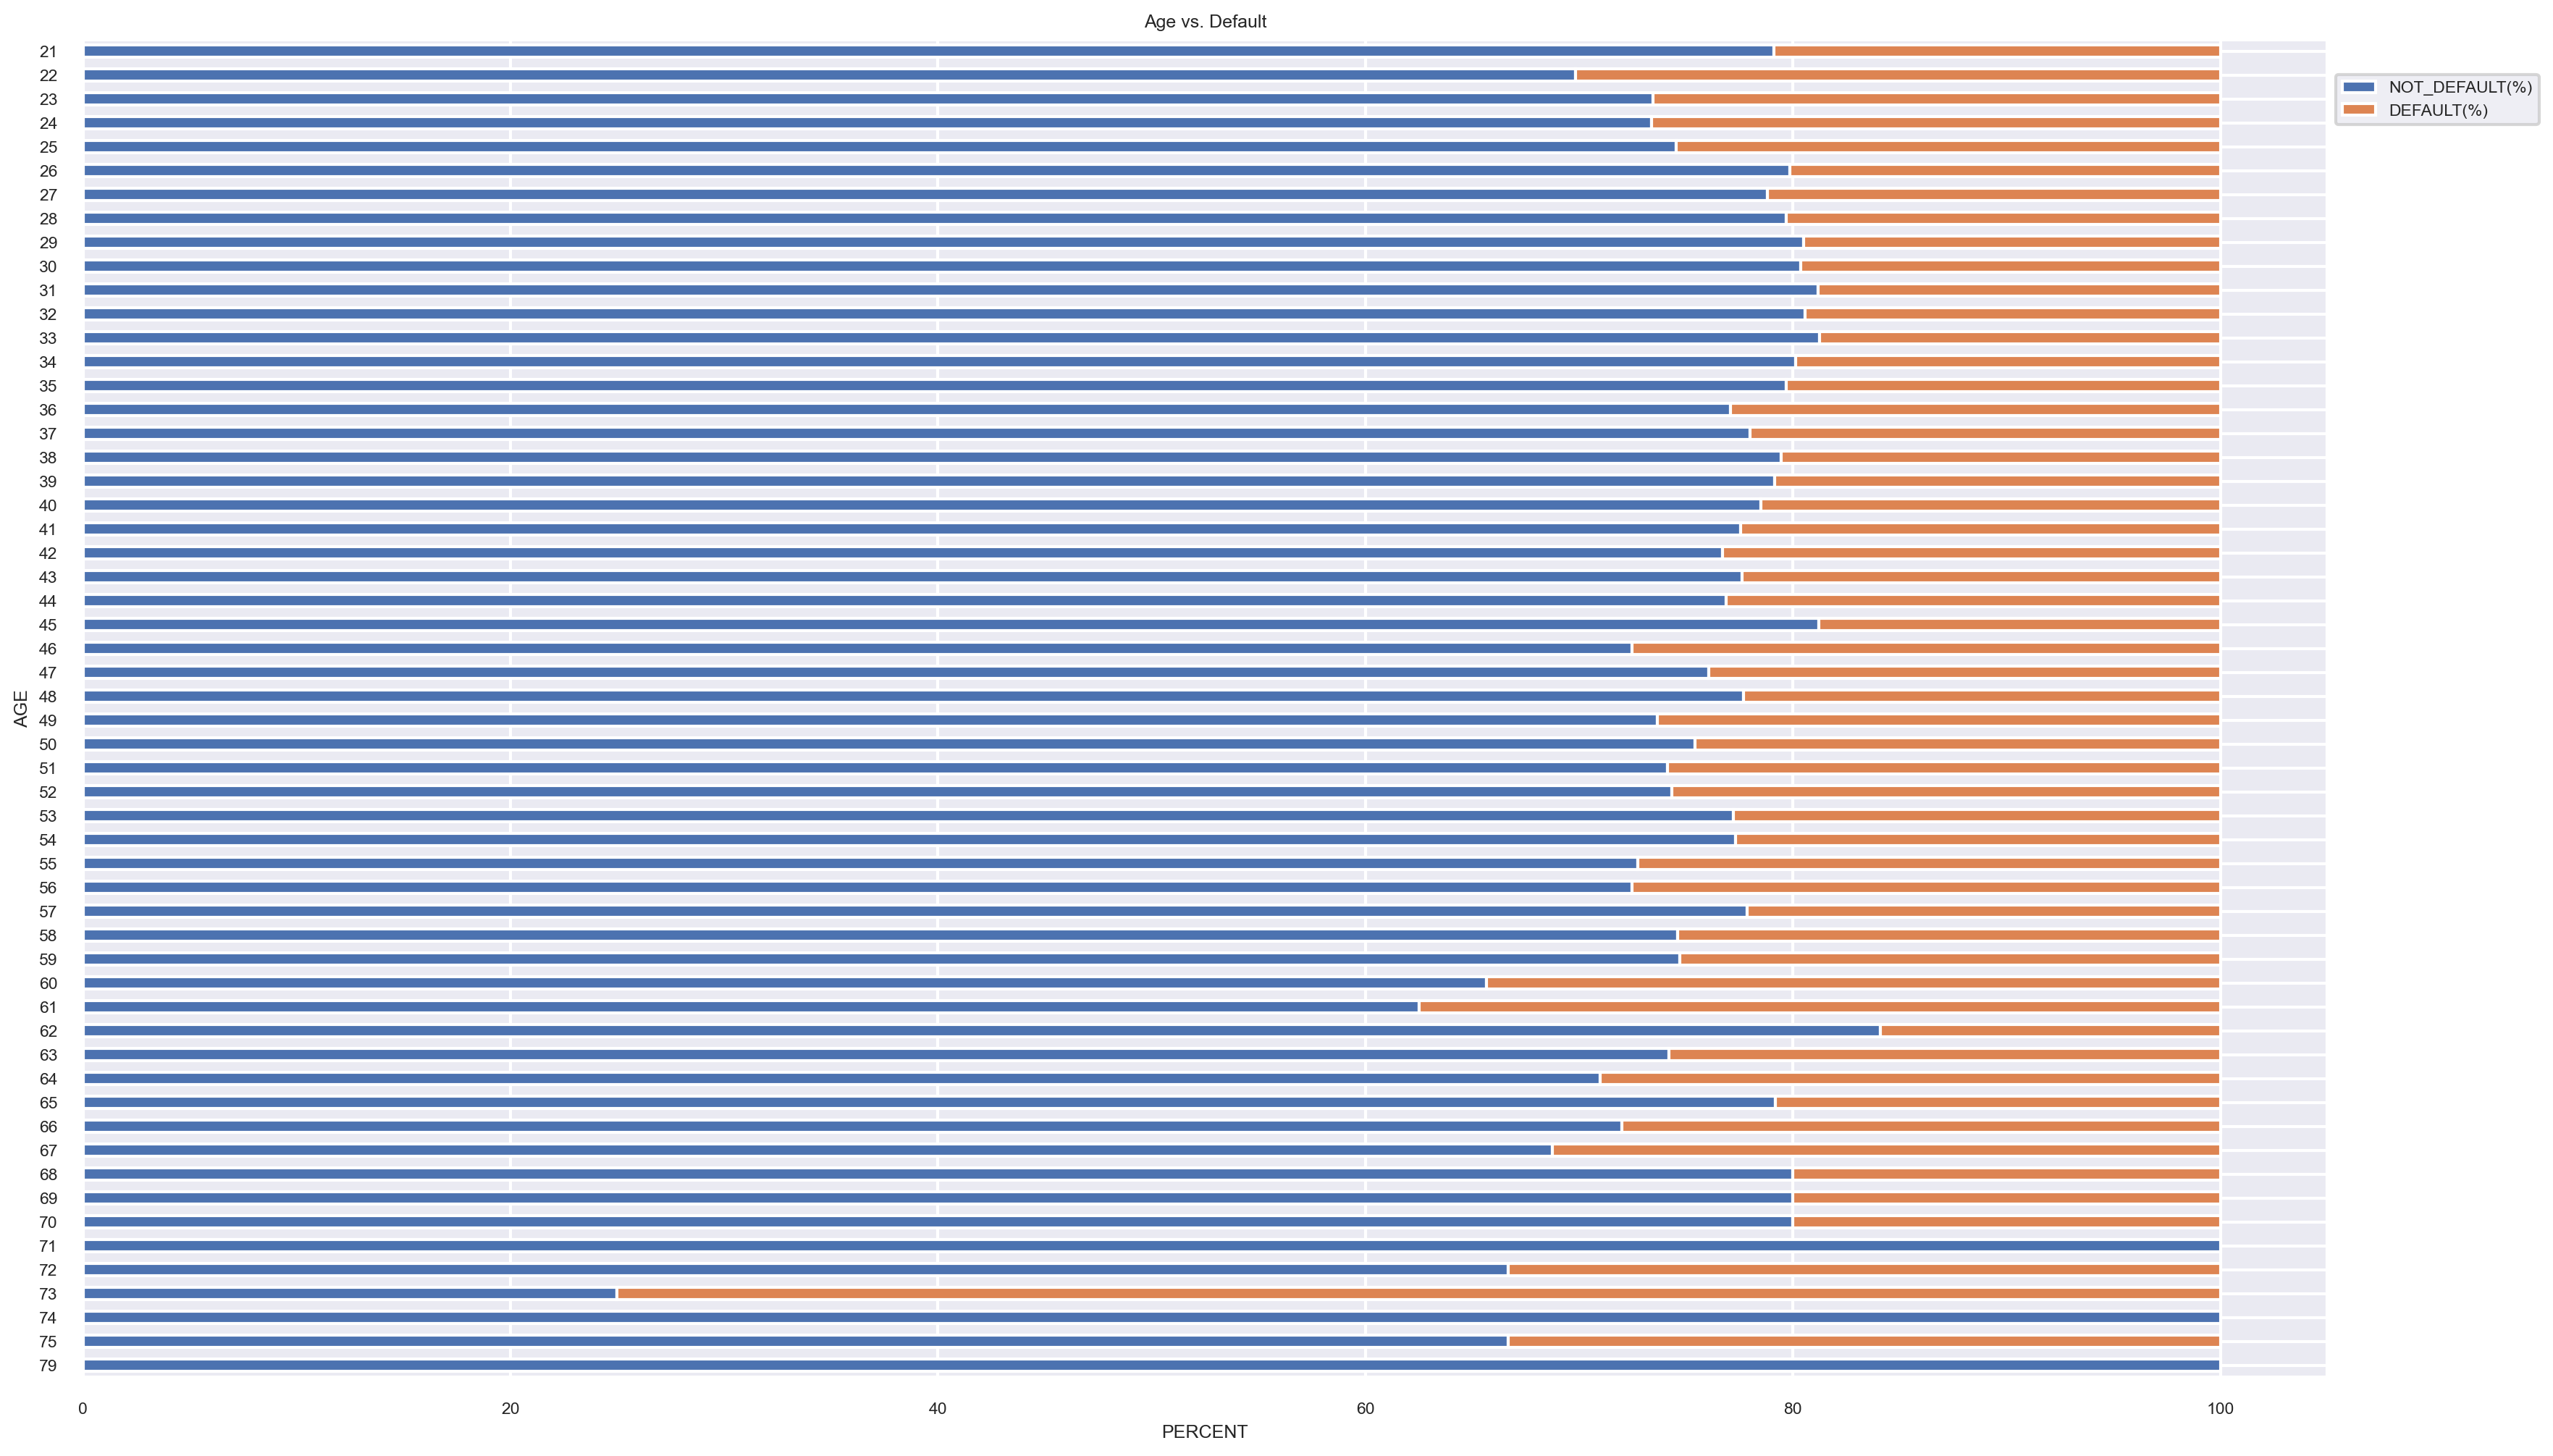

In [27]:
sns.set(rc={'figure.figsize':(20,12)})
sns.set_context("talk", font_scale=0.5)

ax = agePct.sort_index(ascending=False).plot(x='AGE', kind='barh', stacked=True, title='Age vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.98))
plt.show()

For each age group > 60, we only have few data. So the percentage may not be reliable.
Take a close look at age range from 26 to 35, they have comparative lower default rate. This is also supported by large amount of data.

<Axes: xlabel='SEX', ylabel='count'>

<Figure size 900x600 with 0 Axes>

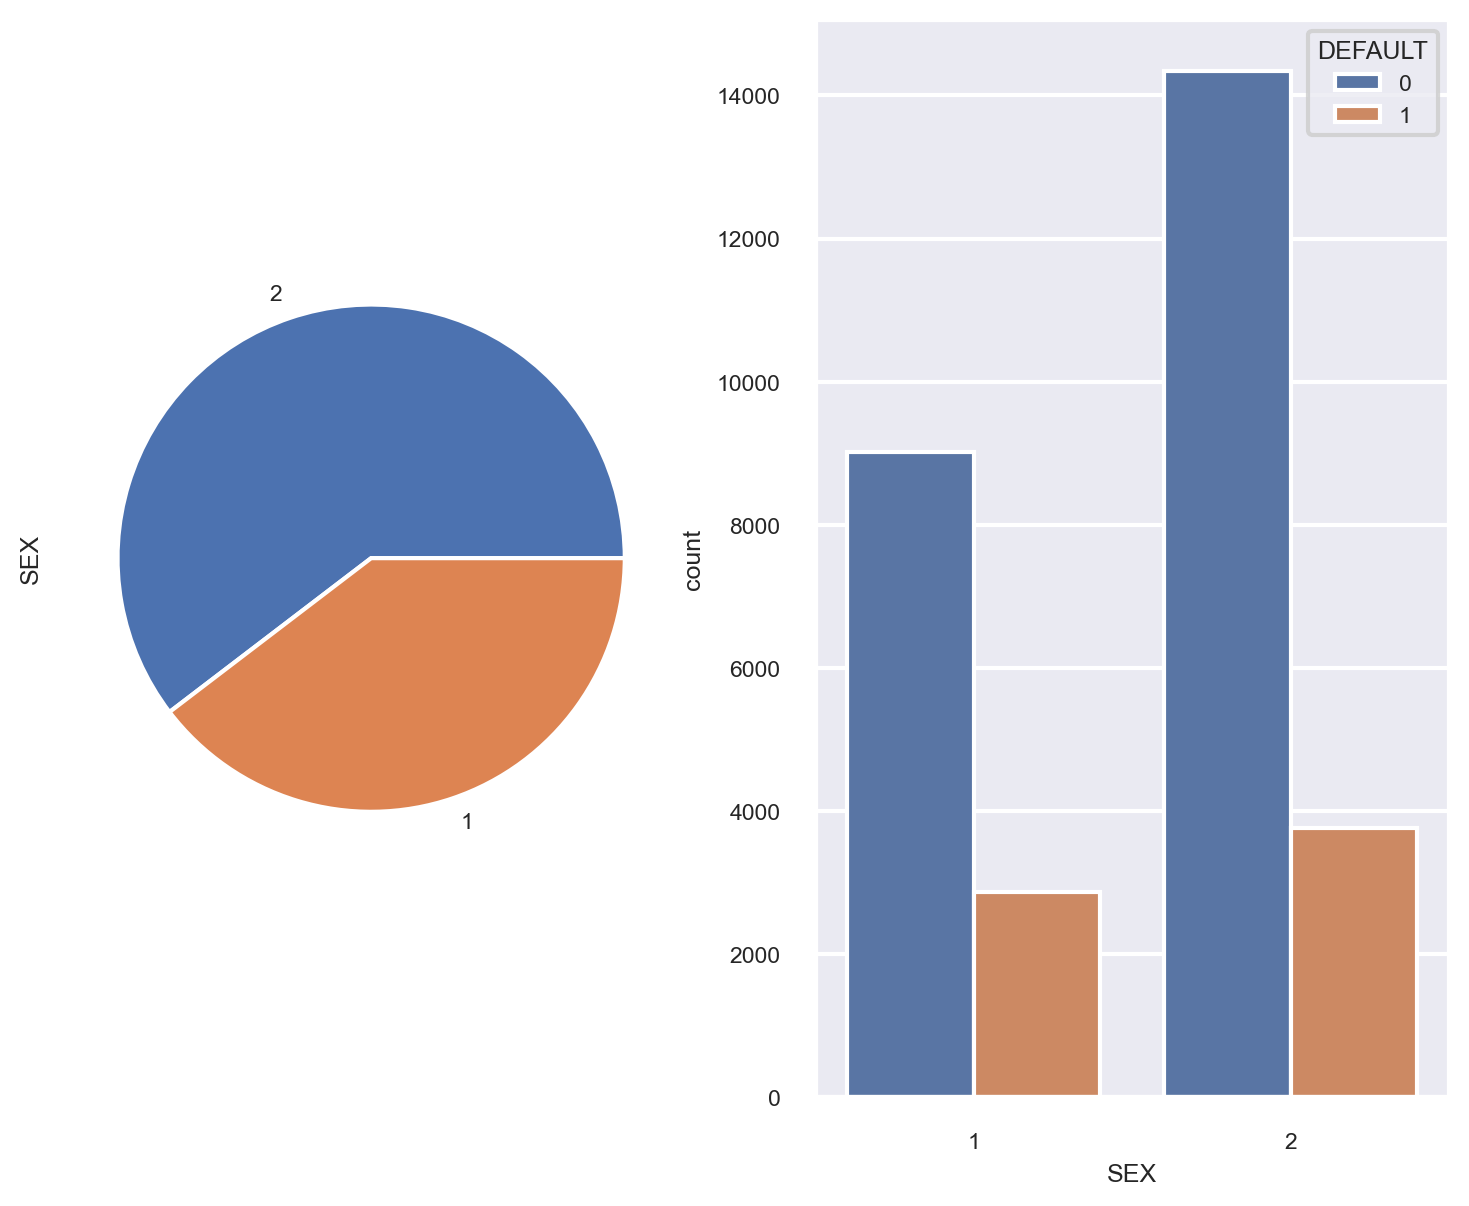

In [28]:

plt.figure(figsize=(9,6))
fig, axes = plt.subplots(ncols=2,figsize=(9,7))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'SEX', hue = 'DEFAULT', data = df)

The number of default customer is slightly high in category 2 which represent female than 1 representing male

PREDICTIVE MODEL MODELS

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [52]:
# Encode categorical variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded = one_hot_encoder.fit_transform(df[['SEX', 'EDUCATION', 'MARRIAGE']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE']))

In [53]:
encoded_df.head(3)

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Scale numerical features
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6']]),
                         columns=['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [55]:
scaled_df.head(3)

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.00000,0.000000,0.000000
1,0.111111,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.00161,0.000000,0.003783
2,0.080808,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.00161,0.002345,0.009458


In [56]:
# Combine all features
X = pd.concat([encoded_df, scaled_df], axis=1)
y = df['DEFAULT']


In [57]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [59]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [60]:
# Support Vector Machine Model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [61]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [62]:
# XGBoost Model with Hyperparameter Tuning
xgb_model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [63]:
# Evaluate models
models = {
    'Logistic Regression': (logistic_model, y_pred_logistic),
    'Random Forest': (rf_model, y_pred_rf),
    'SVM': (svm_model, y_pred_svm),
    'Gradient Boosting': (gb_model, y_pred_gb),
    'XGBoost': (best_xgb_model, y_pred_xgb)
}

model_reports = {}

for name, (model, y_pred) in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    model_reports[name] = report

model_reports

{'Logistic Regression': {'0': {'precision': 0.8184538056486357,
   'recall': 0.9714488636363636,
   'f1-score': 0.8884125746947259,
   'support': 7040},
  '1': {'precision': 0.687888198757764,
   'recall': 0.2260204081632653,
   'f1-score': 0.34024577572964665,
   'support': 1960},
  'accuracy': 0.8091111111111111,
  'macro avg': {'precision': 0.7531710022031999,
   'recall': 0.5987346358998145,
   'f1-score': 0.6143291752121862,
   'support': 9000},
  'weighted avg': {'precision': 0.7900195179257347,
   'recall': 0.8091111111111111,
   'f1-score': 0.7690340273645531,
   'support': 9000}},
 'Random Forest': {'0': {'precision': 0.8412132024977699,
   'recall': 0.9376420454545454,
   'f1-score': 0.8868139987908915,
   'support': 7040},
  '1': {'precision': 0.619254119687771,
   'recall': 0.36428571428571427,
   'f1-score': 0.4587214905236106,
   'support': 1960},
  'accuracy': 0.8127777777777778,
  'macro avg': {'precision': 0.7302336610927704,
   'recall': 0.6509638798701298,
   'f1-sco

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.69      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



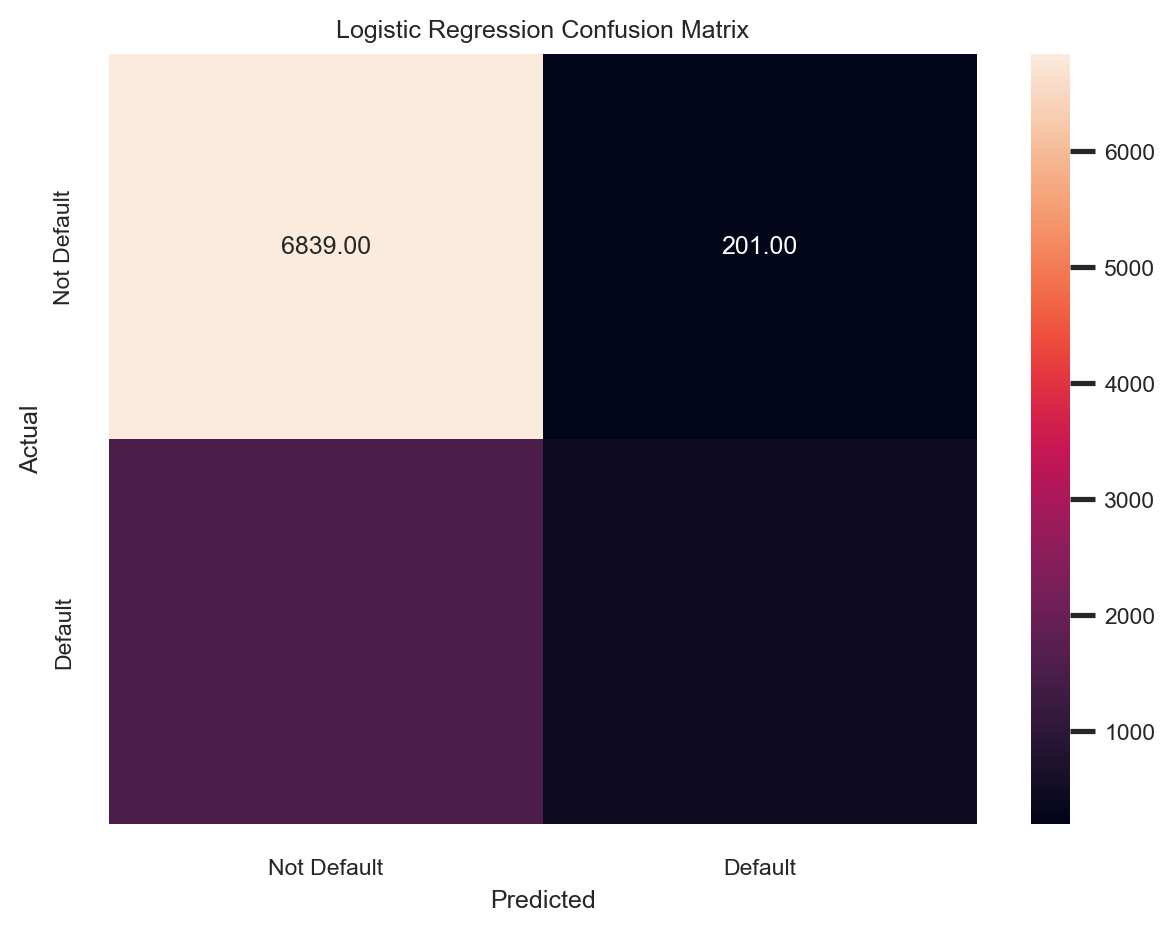

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



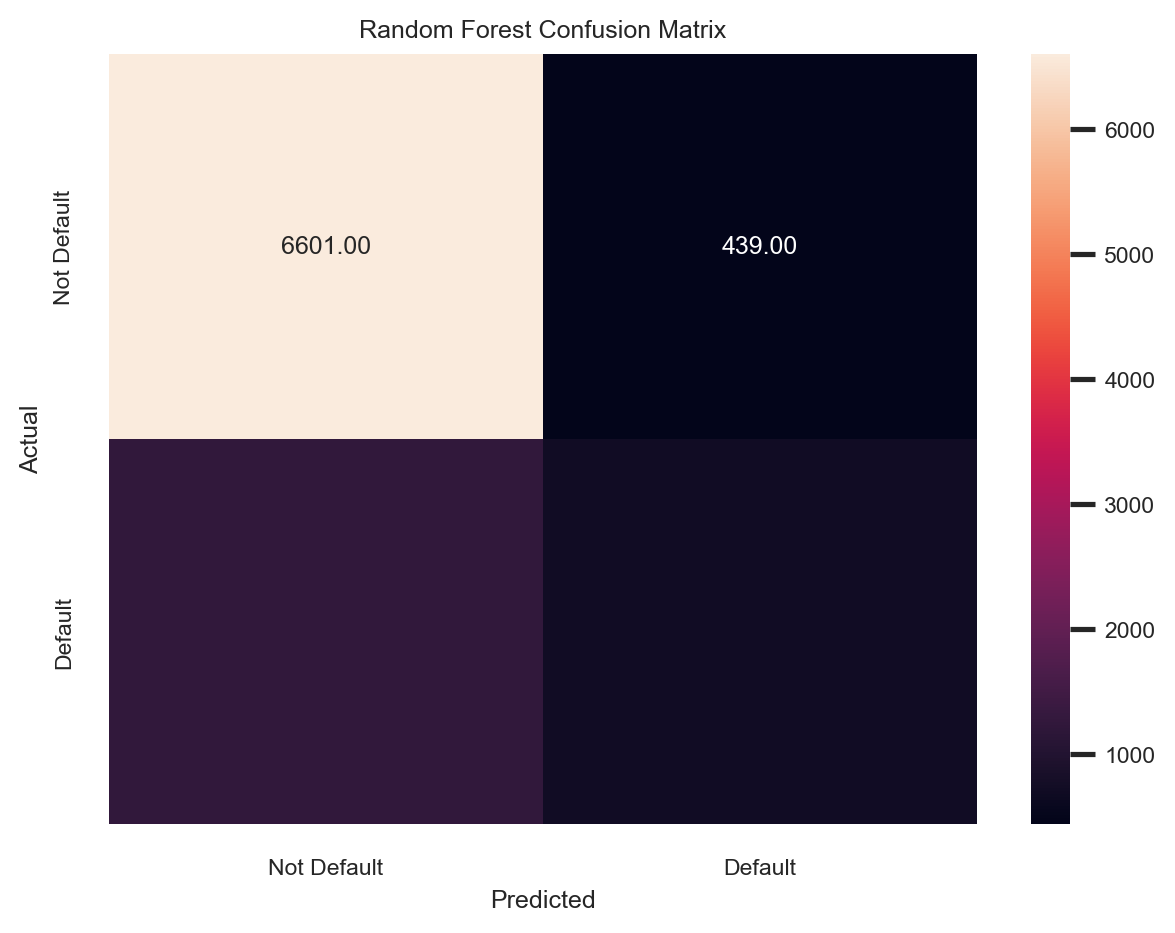

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7040
           1       0.65      0.26      0.37      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.61      0.63      9000
weighted avg       0.78      0.81      0.77      9000



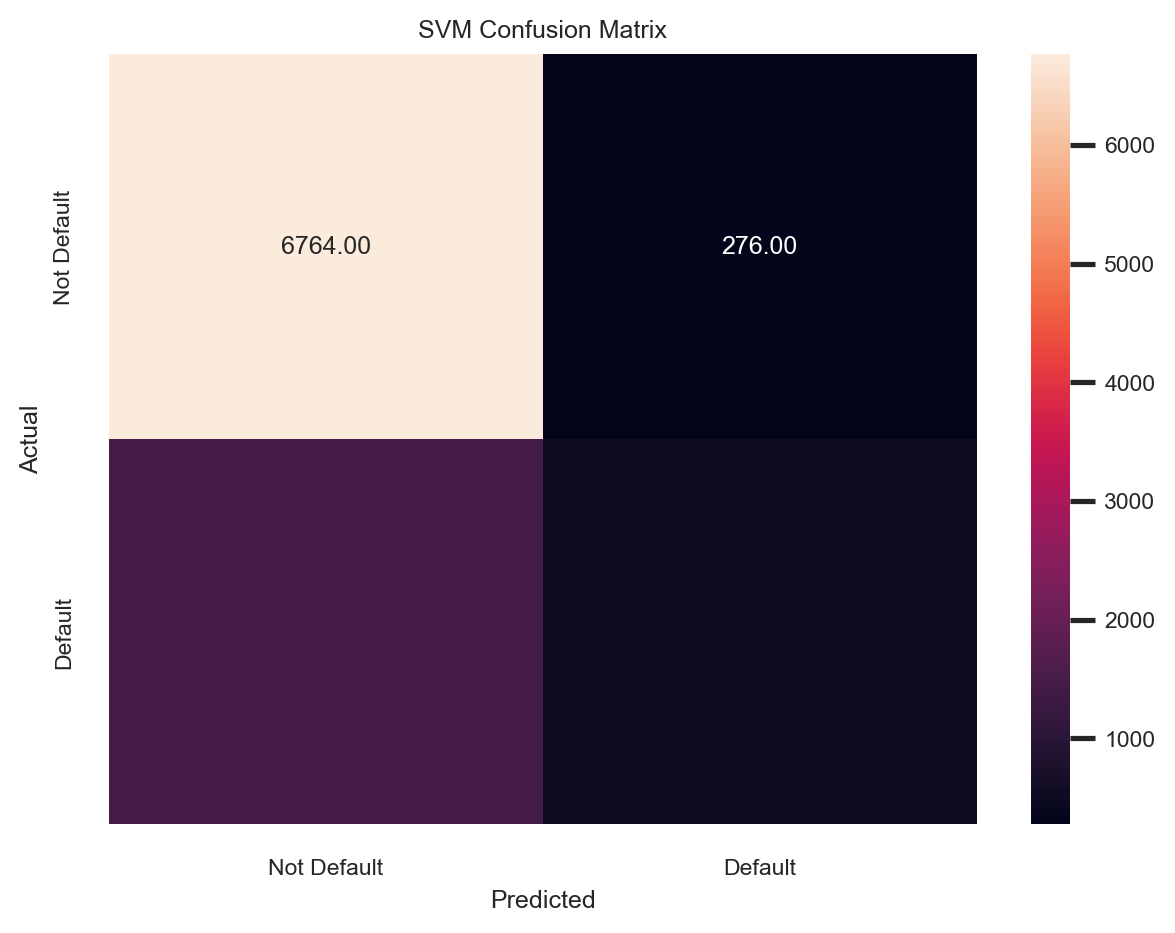

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



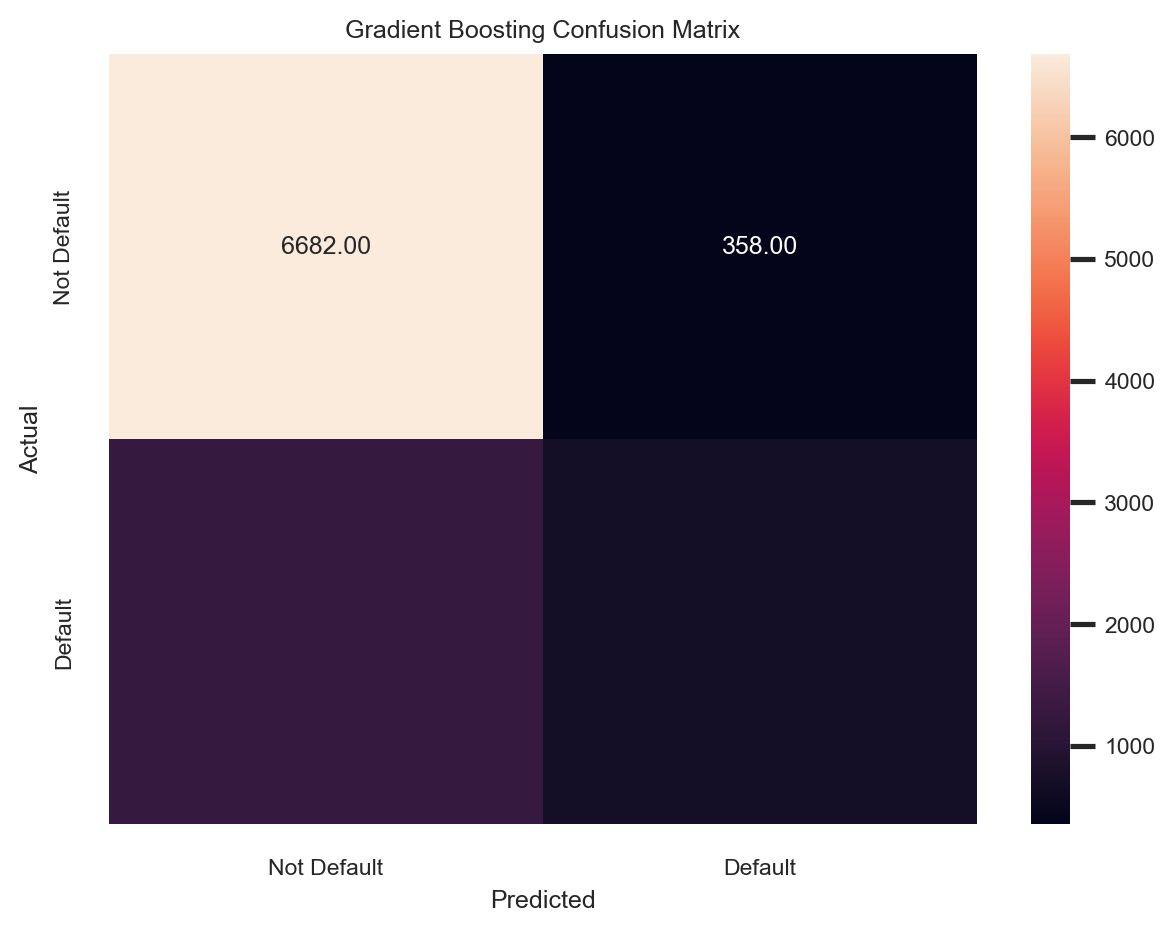

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



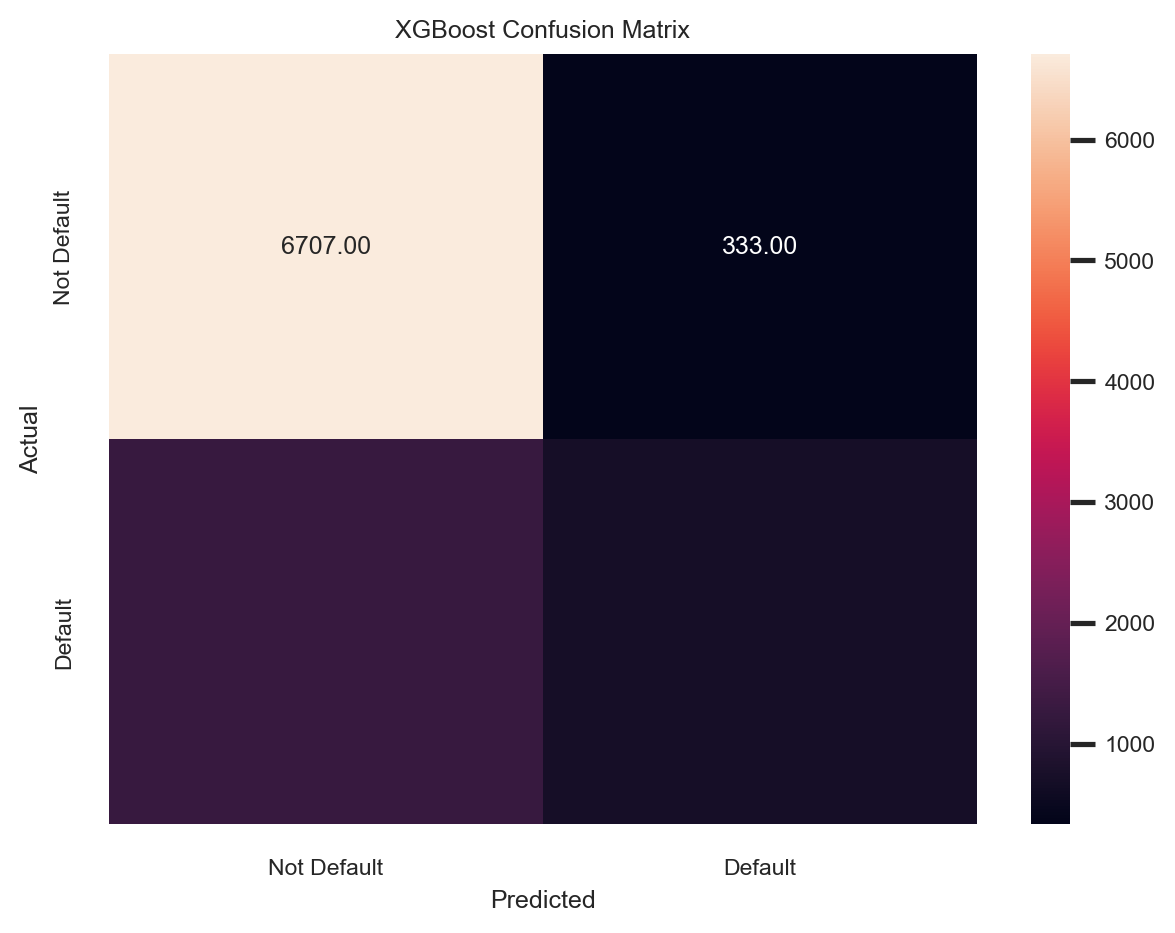

In [64]:
# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

for name, (model, y_pred) in models.items():
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f'{name} Confusion Matrix')


In [65]:
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

In [66]:
# Load the saved model for verification
loaded_model = joblib.load('best_xgb_model.pkl')

In [67]:
# Verify by making predictions
y_pred_loaded = loaded_model.predict(X_test)

In [68]:
# Evaluate the loaded model
print("Classification Report for Loaded Model:")
print(classification_report(y_test, y_pred_loaded))

Classification Report for Loaded Model:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [69]:
# Preprocessing function
def preprocess_new_data(new_data, one_hot_encoder, scaler):
    encoded = one_hot_encoder.transform(new_data[['SEX', 'EDUCATION', 'MARRIAGE']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE']))
    
    scaled_df = pd.DataFrame(scaler.transform(new_data[['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                                        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                                        'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                                        'PAY_AMT6']]),
                             columns=['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                      'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
    
    preprocessed_data = pd.concat([encoded_df, scaled_df], axis=1)
    
    return preprocessed_data

In [70]:
# Prediction function
def predict_default(new_data, model_path='best_xgb_model.pkl'):
    model = joblib.load(model_path)
    preprocessed_data = preprocess_new_data(new_data, one_hot_encoder, scaler)
    predictions = model.predict(preprocessed_data)
    
    messages = ['The customer is likely to default' if pred == 1 else 'The customer will not default' for pred in predictions]
    return messages
    
    #return predictions

In [71]:
# Example new data
new_data = pd.DataFrame({
    'SEX': [1, 2],
    'EDUCATION': [2, 1],
    'MARRIAGE': [1, 2],
    'LIMIT_BAL': [20000, 120000],
    'PAY_1': [2, -1],
    'PAY_2': [2, 2],
    'PAY_3': [-1, 0],
    'PAY_4': [-1, 0],
    'PAY_5': [0, 0],
    'PAY_6': [0, 0],
    'BILL_AMT1': [3913, 2682],
    'BILL_AMT2': [3102, 1725],
    'BILL_AMT3': [689, 2682],
    'BILL_AMT4': [0, 3272],
    'BILL_AMT5': [0, 3455],
    'BILL_AMT6': [0, 3261],
    'PAY_AMT1': [0, 0],
    'PAY_AMT2': [689, 1000],
    'PAY_AMT3': [0, 1000],
    'PAY_AMT4': [0, 1000],
    'PAY_AMT5': [0, 1000],
    'PAY_AMT6': [0, 1000]
})

In [72]:
# Predict default with user-friendly messages
messages = predict_default(new_data)
for message in messages:
    print(message)

The customer is likely to default
The customer will not default


In [73]:
# Save the encoders
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']